In [29]:
import fitsio
from astropy.table import Table, vstack, join
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors

In [17]:
def mag2flux(mag, zp=30.):
    return np.power(10, -(mag-zp)/2.5)

In [2]:
det_file = '/project/projectdirs/des/severett/Balrog/run2/stacked_catalogs/stars/1.4/sof/balrog_detection_catalog_sof_run2_stars_v1.4.fits'
det = Table(fitsio.read(det_file))

In [18]:
g_flux = mag2flux(det['true_g_Corr'])
r_flux = mag2flux(det['true_g_Corr'] - det['true_gr_Corr'])
i_flux = mag2flux(det['true_g_Corr'] - det['true_gr_Corr'] - det['true_ri_Corr'])
z_flux = mag2flux(det['true_g_Corr'] - det['true_gr_Corr'] - det['true_ri_Corr'] - det['true_iz_Corr'])

In [19]:
avg_riz_flux = np.mean([r_flux, i_flux, z_flux], axis=0)

In [20]:
det['true_avg_riz_flux'] = avg_riz_flux

In [21]:
print(len(det))
print(len(avg_riz_flux))

2462513
2462513


In [22]:
det

bal_id,meas_tilename,meas_id,detected,true_ra,true_dec,true_g_Corr,true_gr_Corr,true_ri_Corr,true_iz_Corr,true_gi_Corr,meas_FLAGS_GOLD_SOF_ONLY,meas_EXTENDED_CLASS_SOF,ext_fact [4],ext_mag [4],flags_footprint,flags_foreground,flags_badregions,true_avg_riz_flux
int64,str12,int64,int64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64
100000052480,DES0000-5248,30537,1,0.05694045276410588,-52.698447156681546,20.9326431303,1.29397799241,0.7894516495,0.322890072736,2.08342964191,0,0,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,16.0,0.0,27222.34788977612
100000052481,DES0000-5248,15174,1,359.9475699491798,-52.947383660742624,24.010375436799997,0.404143781489,0.0254007242209,0.093418110663,0.42954450571,0,1,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,0.0,0.0,377.7649125520911
100000052482,DES0000-5248,4611,1,359.69211814909374,-53.10997615150865,23.7332981248,1.3657969691,0.428861890978,0.267755548461,1.79465886007,0,0,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,0.0,0.0,1650.9736927267038
100000052483,DES0000-5248,45394,1,359.45460368693836,-52.469560595436626,22.3041126644,1.35713583757,1.08702916881,0.477689883223,2.4441650063900004,0,0,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,0.0,0.0,11073.819150983341
100000052484,DES0000-5248,26909,1,0.5207792517231901,-52.75416119282229,26.0603273251,1.4155682231600002,1.15080163099,0.5494985504959999,2.56636985415,0,2,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,0.0,0.0,401.03641633387605
100000052485,DES0000-5248,-1,0,359.62275119188524,-52.8522110213518,26.3594078708,1.34169083045,1.0007350994,0.436254306303,2.34242592984,999999,999999,nan .. nan,nan .. nan,1.0,16.0,0.0,238.41741190458347
100000052486,DES0000-5248,26501,1,359.9412002239936,-52.76183161696467,22.045828363600002,0.24701377355,0.0784278413774,0.0207626608602,0.325441614928,0,0,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,-1.6375e+30,16.0,0.0,2015.9978458388732
100000052487,DES0000-5248,38780,1,359.5412058887292,-52.56758311751649,23.9168148552,1.23592536478,0.411374490441,0.227244911554,1.6472998552200002,0,0,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,16.0,0.0,1202.4695929228556
100000052488,DES0000-5248,38876,1,0.32893175086181237,-52.566699971273515,25.617926287,1.38227479889,1.2432544438200002,0.555938954404,2.6255292427200003,0,3,0.955299973487854 .. 0.9829000234603882,0.04969999939203262 .. 0.018699999898672104,1.0,0.0,0.0,632.614151525813


In [37]:
det.write(det_file, overwrite=True)

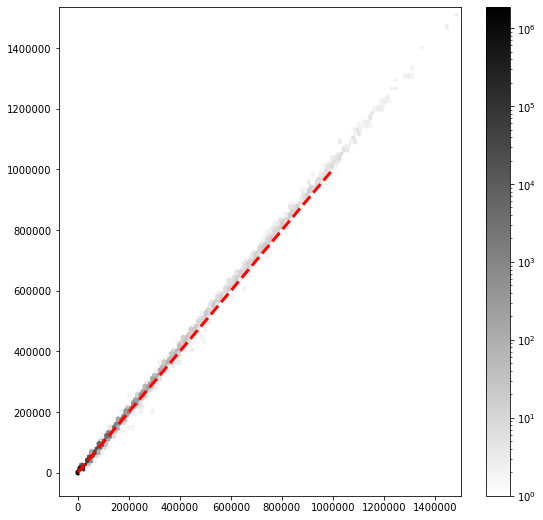

In [35]:
xlim = [0, 1e6]
ylim = xlim
plt.hexbin(det['true_avg_riz_flux'], i_flux, cmap='gray_r', norm=colors.LogNorm())
plt.colorbar()
plt.plot(xlim, ylim, c='r', ls='--', lw=3)
plt.gcf().set_size_inches(9, 9)
plt.show()